In [3]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.python import keras 
from keras import __version__
keras.__version__ = __version__

import keras_tuner as kt

from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.python.keras.models import Sequential, save_model, load_model, Model
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, Flatten, Embedding, Input
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.saving import hdf5_format


In [4]:
#voice datapaths
Ravdess = "C:\\Users\\ASUS\\078BCT034 Zen\\kaggle\\Ravdess\\audio_speech_actors_01-24\\"
Crema = "C:\\Users\\ASUS\\078BCT034 Zen\\kaggle\\Crema\\"
Tess = "C:\\Users\\ASUS\\078BCT034 Zen\\kaggle\\Tess\\"
Savee = "C:\\Users\\ASUS\\078BCT034 Zen\\kaggle\\Savee\\"

In [5]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24000\3712271646.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


In [6]:
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
1  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
2  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
3  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
4  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...

In [7]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + file)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Crema\1001_...
1  disgust  C:\Users\ASUS\078BCT034 Zen\kaggle\Crema\1001_...
2     fear  C:\Users\ASUS\078BCT034 Zen\kaggle\Crema\1001_...
3    happy  C:\Users\ASUS\078BCT034 Zen\kaggle\Crema\1001_...
4  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Crema\1001_...

In [8]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Tess\OAF_an...
1    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Tess\OAF_an...
2    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Tess\OAF_an...
3    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Tess\OAF_an...
4    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Tess\OAF_an...

In [9]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Savee\DC_a0...
1    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Savee\DC_a0...
2    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Savee\DC_a0...
3    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Savee\DC_a0...
4    angry  C:\Users\ASUS\078BCT034 Zen\kaggle\Savee\DC_a0...

In [10]:
voice_data = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
voice_data.to_csv("voice_data.csv",index=False)
voice_data.head()

Emotions                                               Path
0  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
1  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
2  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
3  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
4  neutral  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...

In [11]:
voice_data.describe()

Emotions                                               Path
count     12161                                              12161
unique        7                                              12161
top       happy  C:\Users\ASUS\078BCT034 Zen\kaggle\Ravdess\aud...
freq       1923                                                  1

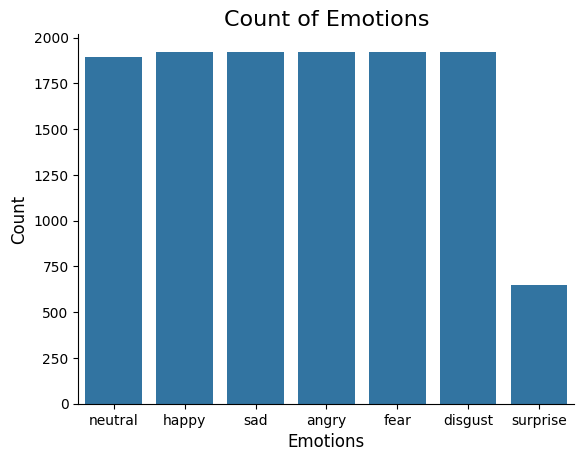

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(x ='Emotions', data = voice_data)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
def create_waveshow(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

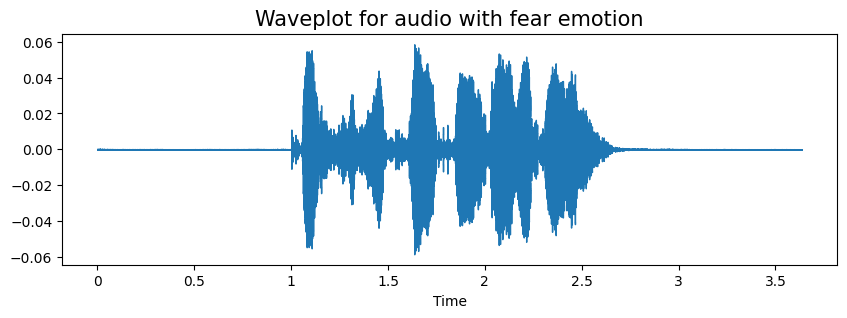

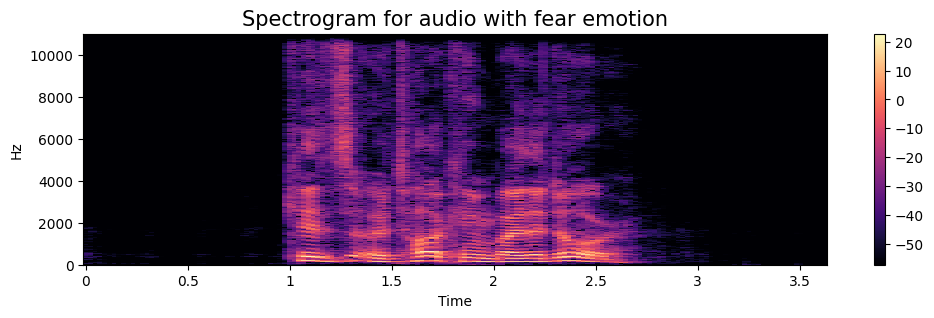

In [14]:
emotion='fear'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

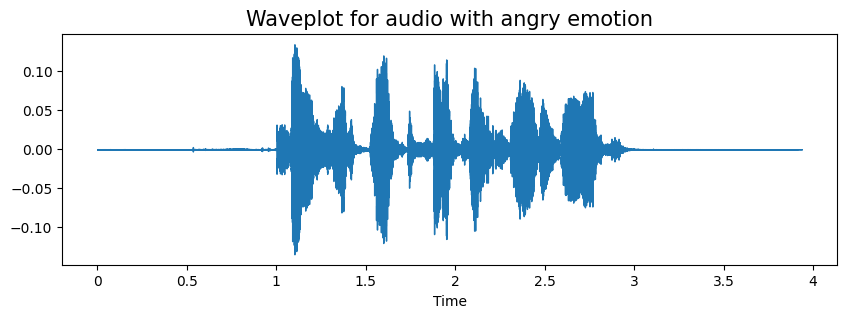

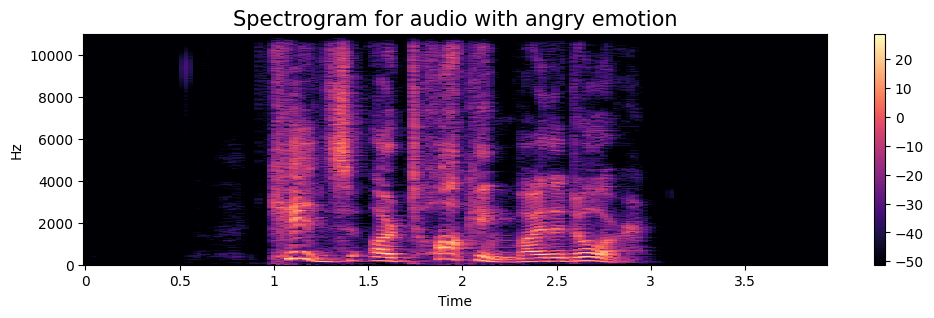

In [ ]:
emotion='angry'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)S

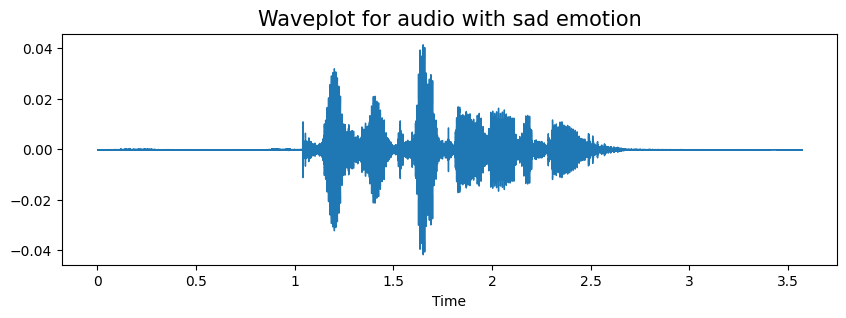

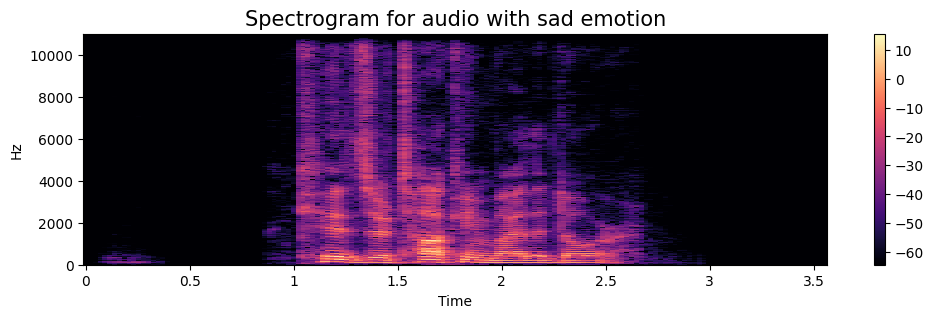

In [16]:
emotion='sad'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

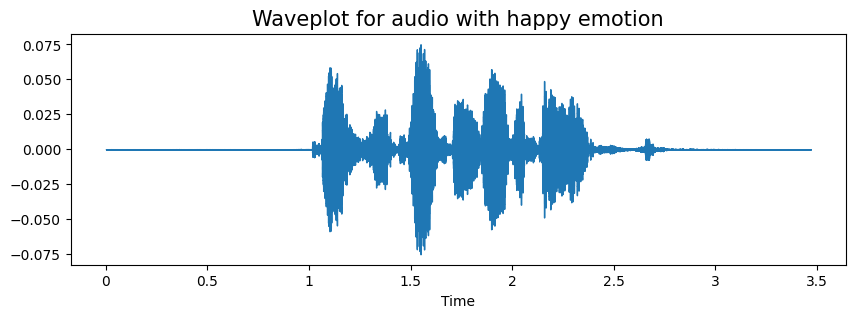

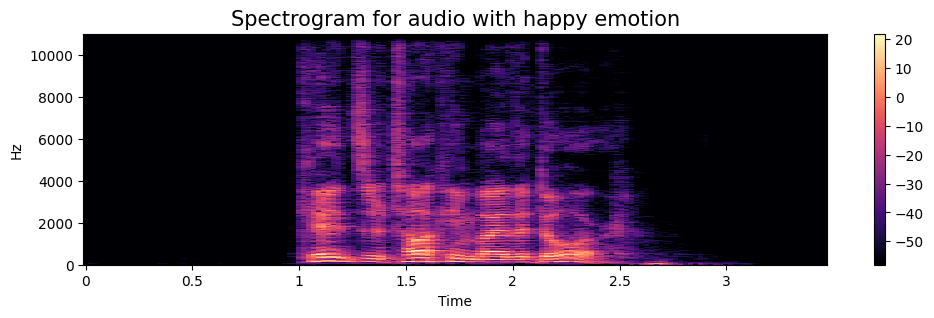

In [17]:

emotion='happy'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [18]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=1):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

path = np.array(voice_data.Path)[1]
data, sample_rate = librosa.load(path)

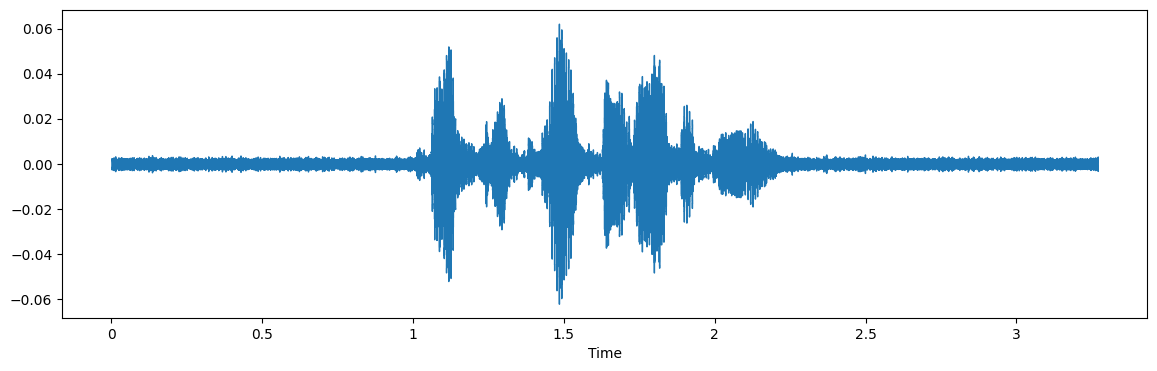

In [33]:
#noise injection
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

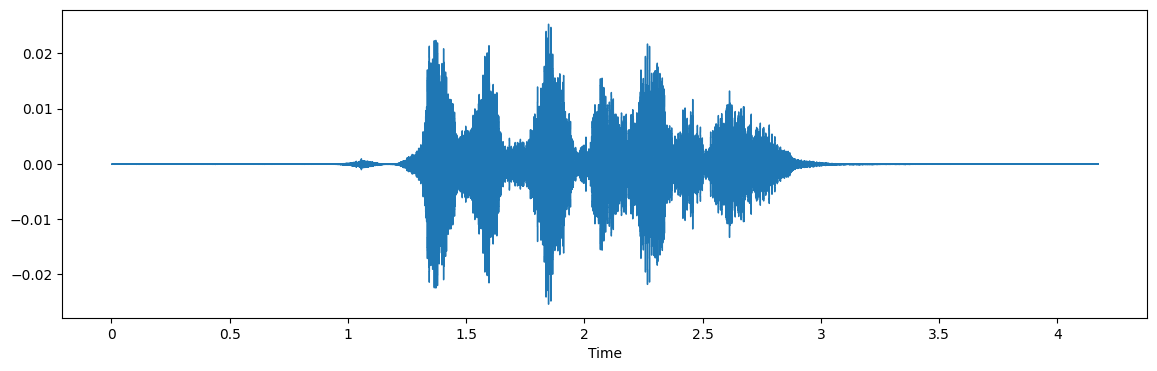

In [20]:
#streching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

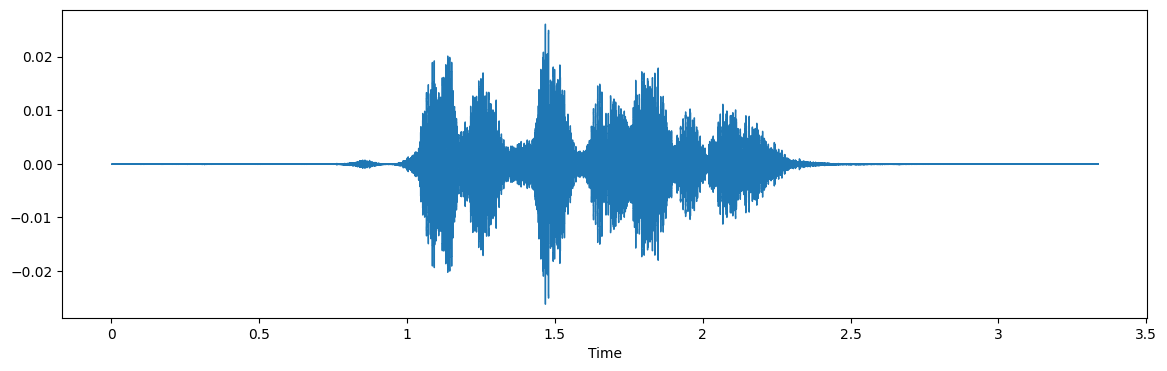

In [21]:
#pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

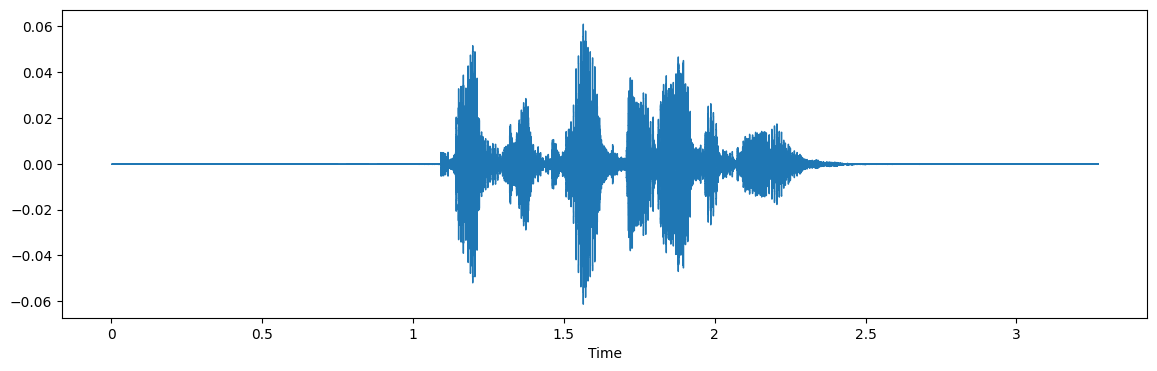

In [34]:
#shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [23]:
def extract_features(data):
    # Contrast
    result = np.array([])
    stft = np.abs(librosa.stft(data))
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, contrast)) # make column

    # Chroma_stft(pitch)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, chroma))

    # MFCC(echo)
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))

    # tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate).T,axis=0)
    result = np.hstack((result, tonnetz))   

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    #zero crossing rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    #root mean square
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    #spectraal_bandwidth
    BW = np.mean(librosa.feature.spectral_bandwidth(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, BW))
    
    return result

def get_features(path):
    # used to take care of the no audio in start and the ending of each audio files.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # row
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))
    
    return result

In [32]:

X, Y = [], []
for path, emotion in zip(voice_data.Path, voice_data.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=578
  warnings.warn(
c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=722
  warnings.warn(
c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=598
  warnings.warn(
c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=748
  warnings.warn(
c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=541
  warnings.warn(
c:\Users\ASUS\Desktop\Zen\Code\Minor\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is to

In [ ]:
path = np.array(voice_data.Path)[130]
data, sample_rate = librosa.load(path)
Audio(path)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray() 

In [ ]:
#####################Rerun from here########################

In [ ]:
Features = pd.read_csv('features.csv')
print(Features.head())

           0          1          2          3          4          5  \
0  21.719059  11.853675  15.942501  15.102605  15.750958  17.976807   
1  16.072900  12.288808  15.088785  13.961777  14.532521  14.032382   
2  23.225943  13.984175  17.362169  16.700473  18.490009  20.639216   
3  23.183847  13.007365  17.096784  15.801211  15.745660  17.866520   
4  18.469353  12.798901  15.928753  15.047770  14.834736  15.161229   

           6         7         8         9  ...           187           188  \
0  46.214819  0.729664  0.750033  0.730624  ...  2.279739e-06  5.116493e-06   
1  13.464340  0.813895  0.822991  0.816758  ...  8.230778e-05  8.517213e-05   
2  47.467473  0.647953  0.693290  0.761678  ...  7.076103e-07  4.494912e-07   
3  45.765516  0.673896  0.722096  0.723508  ...  6.979548e-06  1.214236e-05   
4  13.714192  0.741823  0.780844  0.786740  ...  2.487589e-05  3.054181e-05   

            189       190           191           192       193       194  \
0  8.190282e-06  0.00

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray() 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test2, Y_val, Y_test2 = train_test_split(X, Y, test_size=0.5, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29186, 196), (29186, 7), (7297, 196), (7297, 7))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test2 = np.expand_dims(X_test2, axis=2)

In [ ]:
x_train.shape, y_train.shape, X_val.shape, Y_val.shape

((29186, 196, 1), (29186, 7), (18241, 196, 1), (18241, 7))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
class Tuning(kt.HyperModel):
    def build(self, hp):
        model = Sequential()

        num_conv_layers = hp.Int('conv_layers', 3, 5)

        for i in range(num_conv_layers):
            model.add(Conv1D(
                filters=hp.Int(f'filters_{i}', 64, 256, step=64), 
                kernel_size=hp.Choice(f'kernel_size_{i}', [3, 5, 7, 9]), 
                activation='relu',
                padding='same',
                kernel_regularizer=l2(hp.Float('l2_reg', 1e-5, 1e-2, sampling='log')) 
            ))
            model.add(BatchNormalization())
            model.add(MaxPooling1D(pool_size=hp.Choice(f'pool_size_{i}', [2, 3])))

        model.add(Flatten())

        num_dense_layers = hp.Int('dense_layers', 1, 2)
        for j in range(num_dense_layers):
            model.add(Dense(
                units=hp.Int(f'dense_units_{j}', 128, 512, step=128),  
                activation='relu',
                kernel_regularizer=l2(hp.Float('l2_reg_dense', 1e-5, 1e-2, sampling='log'))
            ))
            model.add(Dropout(rate=hp.Float(f'dropout_{j}', 0.2, 0.5, step=0.1))) 

        model.add(Dense(7, activation='softmax'))

        learning_rate = hp.Float('learning_rate', 1e-5, 5e-3, sampling='log') 
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])

        if optimizer_choice == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer_choice == 'sgd':
            optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True) 
        else:
            optimizer = RMSprop(learning_rate=learning_rate, rho=0.9)

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

hp = kt.HyperParameters()

hypermodel = Tuning()

model = hypermodel.build(hp)

model.summary()

In [ ]:
tuner = kt.Hyperband(
    Tuning(),
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='hyper',
    project_name='SER'
)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

tuner.search(
    x_train, 
    y_train, 
    validation_data=(X_val, Y_val), 
    epochs=30, 
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of convolutional layers: {best_hps.get('conv_layers')}")
print(f"Best filters: {[best_hps.get(f'filters_{i}') for i in range(best_hps.get('conv_layers'))]}")
print(f"Best kernel sizes: {[best_hps.get(f'kernel_size_{i}') for i in range(best_hps.get('conv_layers'))]}")
print(f"Best number of dense layers: {best_hps.get('dense_layers')}")
print(f"Best dense units: {[best_hps.get(f'dense_units_{j}') for j in range(best_hps.get('dense_layers'))]}")
print(f"Best dropout rates: {[best_hps.get(f'dropout_{j}') for j in range(best_hps.get('dense_layers'))]}")
print(f"Best optimizer: {best_hps.get('optimizer')}")
print(f"Best regularizer (L2): {best_hps.get('l2_reg_dense')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)

CNN = best_model.fit(
    x_train,
    y_train,
    validation_data=(X_val, Y_val),
    epochs=200,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = best_model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [ ]:
em=['happy','sad','neutral','angry','suprized','fear','disgust']

In [ ]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=-1) 
n = predicted_classes[2]
print(em[n])

In [ ]:
loss, acc = model.evaluate(X_val, Y_val)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [ ]:
print("Accuracy of our model on test data : " , best_model.evaluate(X_val,Y_val)[1]*100 , "%")

epochs = [i for i in range(69)]
fig , ax = plt.subplots(1,2)
train_acc = CNN.history['accuracy']
train_loss = CNN.history['loss']
test_acc = CNN.history['val_accuracy']
test_loss = CNN.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(X_val)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(Y_val)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
best_model.save('cnn.h5')

In [ ]:
model = tf.keras.models.load_model('cnn.h5')

In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 196, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 196, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 98, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 98, 128)        │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 98, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 49, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 49, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 24, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 12, 256)        │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,534,215 (5.85 MB)

 Trainable params: 1,532,167 (5.84 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
print("Input Shape:", model.input_shape)
print("Output Shape:", model.output_shape)

In [ ]:
loss, acc = model.evaluate(X_val, Y_val)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [ ]:
temp_audio_path = "temp_audio.wav"

In [ ]:

EMOTION_LABELS = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

def extract_features(y, sr):
    # Contrast
    result = np.array([])
    stft = np.abs(librosa.stft(y))
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
    result = np.hstack((result, contrast))

    # Chroma_stft(pitch)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    result = np.hstack((result, chroma))

    # MFCC(echo)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))

    # tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T,axis=0)
    result = np.hstack((result, tonnetz))   

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    result = np.hstack((result, mel))

    #zero crossing rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    result=np.hstack((result, zcr))

    #root mean square
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
    result = np.hstack((result, rms))

    #spectraal_bandwidth
    BW = np.mean(librosa.feature.spectral_bandwidth(S=stft, sr=sr).T,axis=0)
    result = np.hstack((result, BW))    
    
    return result

def get_features(path):
    # Load audio with trimming
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Extract features (without augmentation)
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    return result
            
features = get_features(temp_audio_path)

features = features.reshape(1, -1, 1)

prediction = model.predict(features)
predicted_class = np.argmax(prediction[0])

# Map the predicted class to the emotion label
predicted_emotion = EMOTION_LABELS[predicted_class]

# Predict emotion using the model
prediction = model.predict(features)
predicted_emotion = EMOTION_LABELS[np.argmax(prediction[0])]

print(f"Predicted Emotion: {predicted_emotion}")

In [ ]:
Audio(temp_audio_path)

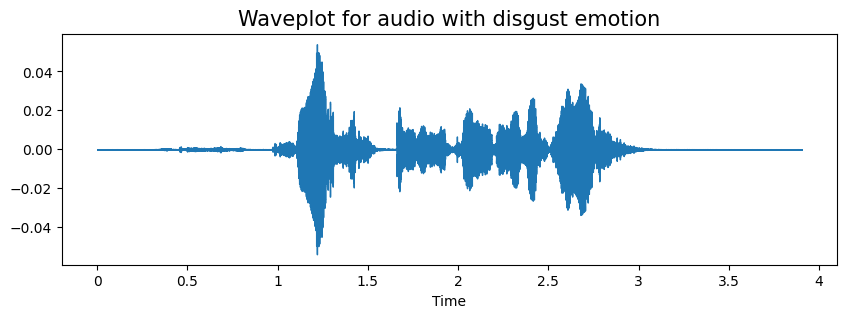

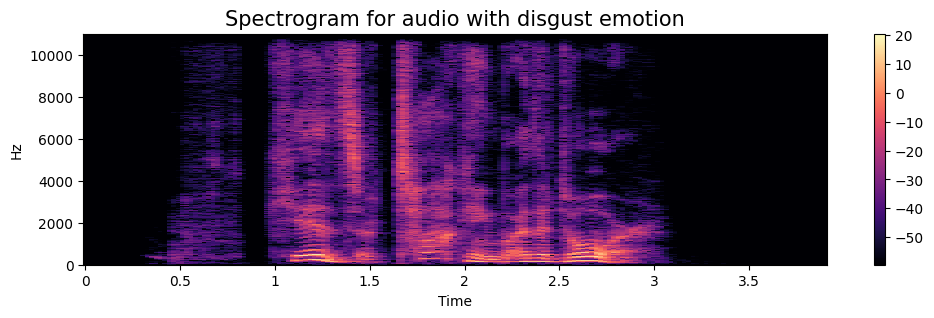

In [27]:
emotion='disgust'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

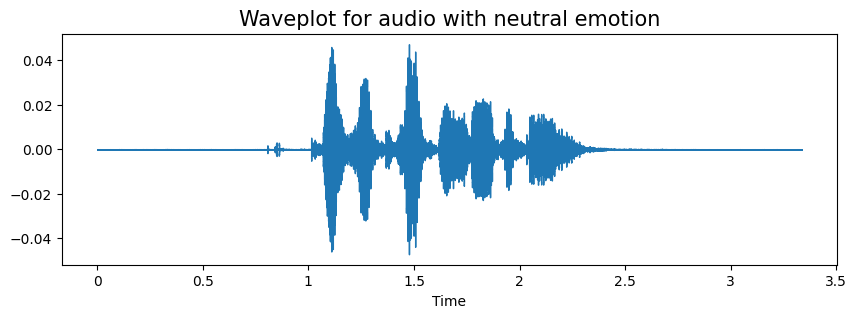

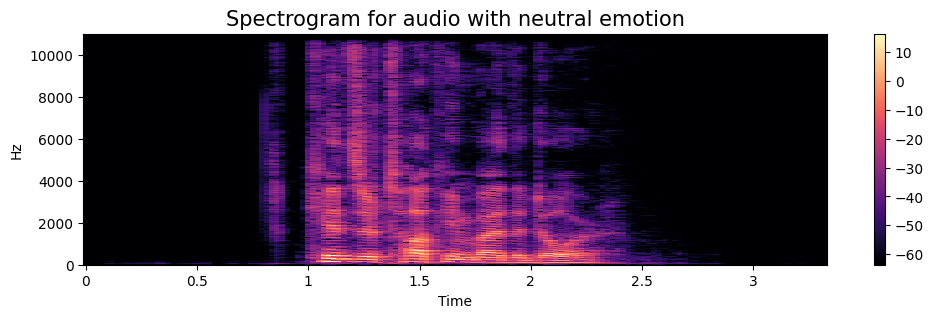

In [30]:
emotion='neutral'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

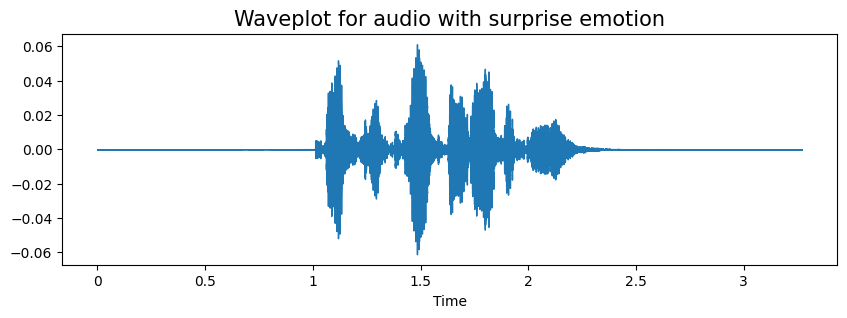

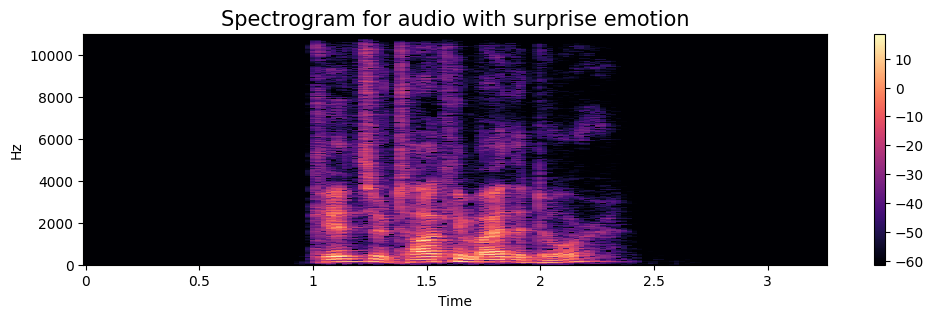

In [31]:
emotion='surprise'
path = np.array(voice_data.Path[voice_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveshow(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)